In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(x_train,y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [3]:
history = model.fit(x_train, y_train, validation_split=0.1, epochs=50, batch_size=1000)

Epoch 1/50
54/54 [==============================] - 0s 6ms/step - loss: 1.1533 - accuracy: 0.6900 - val_loss: 0.3791 - val_accuracy: 0.9072
Epoch 2/50
54/54 [==============================] - 0s 4ms/step - loss: 0.3579 - accuracy: 0.9012 - val_loss: 0.2436 - val_accuracy: 0.9330
Epoch 3/50
54/54 [==============================] - 0s 4ms/step - loss: 0.2746 - accuracy: 0.9216 - val_loss: 0.2029 - val_accuracy: 0.9465
Epoch 4/50
54/54 [==============================] - 0s 4ms/step - loss: 0.2303 - accuracy: 0.9344 - val_loss: 0.1789 - val_accuracy: 0.9515
Epoch 5/50
54/54 [==============================] - 0s 4ms/step - loss: 0.2005 - accuracy: 0.9425 - val_loss: 0.1604 - val_accuracy: 0.9578
Epoch 6/50
54/54 [==============================] - 0s 4ms/step - loss: 0.1756 - accuracy: 0.9496 - val_loss: 0.1434 - val_accuracy: 0.9615
Epoch 7/50
54/54 [==============================] - 0s 4ms/step - loss: 0.1565 - accuracy: 0.9550 - val_loss: 0.1361 - val_accuracy: 0.9617
Epoch 8/50
54/54 [==

In [4]:
(test_loss, test_accuracy) = model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.1034 - accuracy: 0.9730


9730 classified correctly
270 classified incorrectly


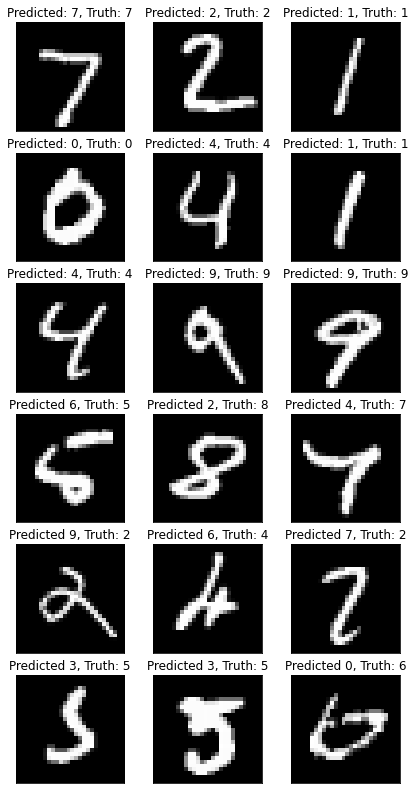

In [5]:
predicted_classes = np.argmax(model.predict(x_test), axis=-1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print(len(correct_indices),"classified correctly")
print(len(incorrect_indices),"classified incorrectly")

plt.rcParams['figure.figsize'] = (7,14)
figure_evaluation = plt.figure()

for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])